In [18]:
import pandas as pd
from sklearn.datasets import make_classification
import os

# 生成数据集
X, y = make_classification(n_samples=130000, n_features=10, n_informative=8, n_classes=2, n_clusters_per_class=3, random_state=42)

# 创建 DataFrame
df = pd.DataFrame(X)
df['target'] = y
# 130K * 0.2 = 26K 130k-26k = 104K > 100K (10client * 100round * [99:1] instance_nums_per_class)
base_path = 'E:/FedStream/data_set_syn/Synthetic0310/'
dataset_path = 'Make_CF/Syn130K_10F_2C/'
path = os.path.join(base_path,dataset_path)
if not os.path.exists(path):
    os.makedirs(path)

source_path = os.path.join(path,'source.csv')
# 将数据保存为 CSV 文件
df.to_csv(source_path, index=False)


D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


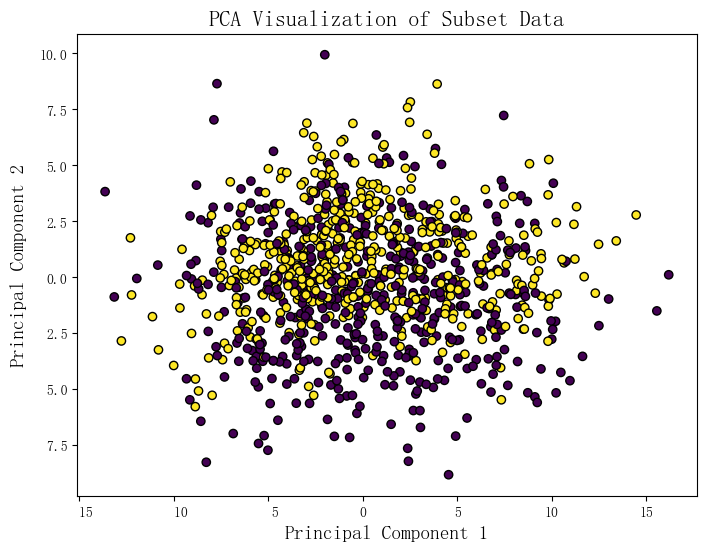

D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


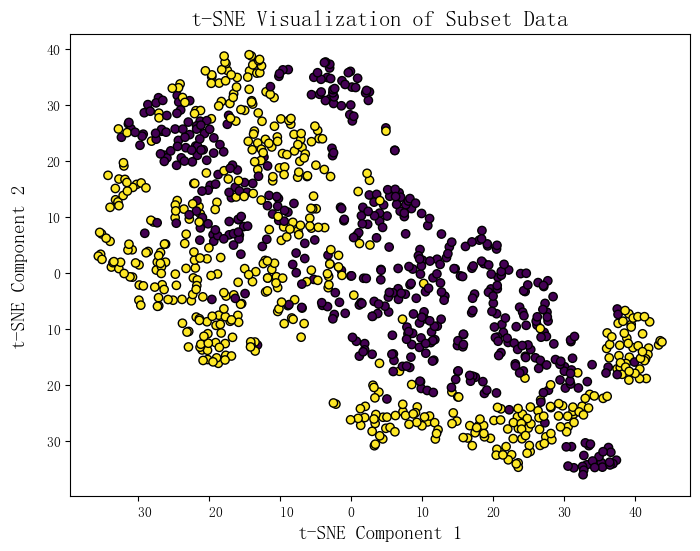

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 提取前1000个样本
X_subset = X[:1000]
y_subset = y[:1000]

# 使用 PCA 进行降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

# 绘制降维后的数据
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset, cmap='viridis', marker='o', edgecolor='black')
plt.xlabel('Principal Component 1',fontsize = 14)
plt.ylabel('Principal Component 2',fontsize = 14)
plt.title('PCA Visualization of Subset Data',fontsize = 16)
# plt.colorbar(label='Class')
plt.show()

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_subset)

# 绘制降维后的数据
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='viridis', marker='o', edgecolor='black')
plt.xlabel('t-SNE Component 1',fontsize = 14)
plt.ylabel('t-SNE Component 2',fontsize = 14)
plt.title('t-SNE Visualization of Subset Data',fontsize = 16)
# plt.colorbar(label='Class')
plt.show()

D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


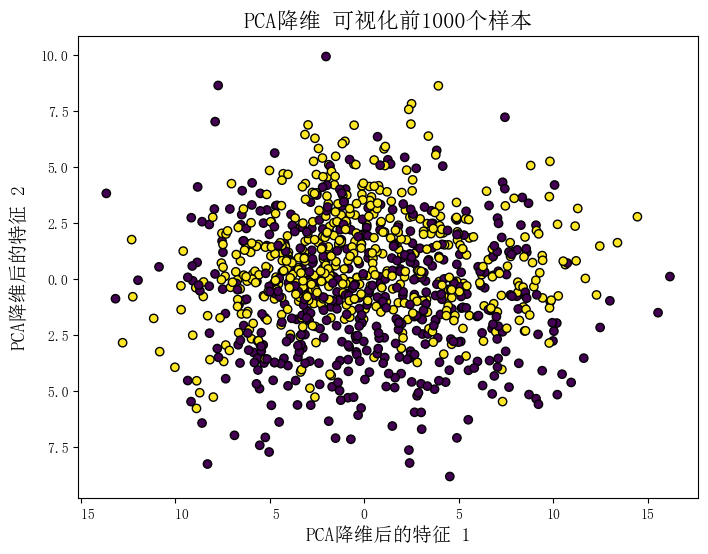

D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


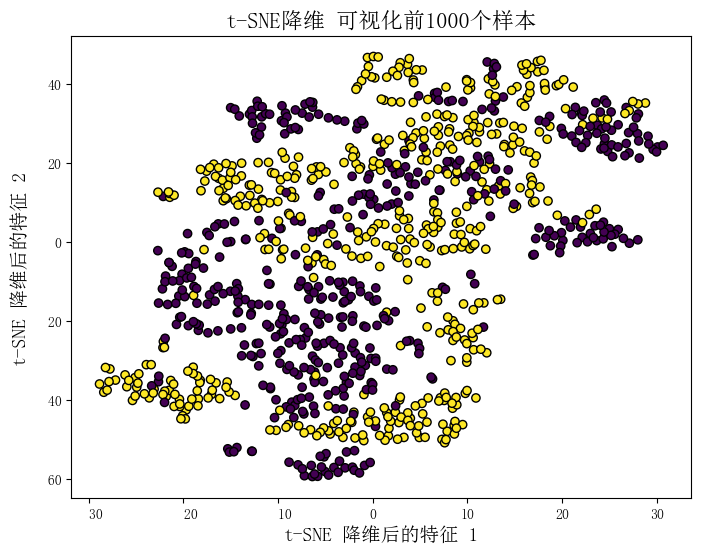

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中文字体路径
font_path = 'C:/Windows/Fonts/simsun.ttc'

# 加载中文字体
prop = fm.FontProperties(fname=font_path)

# 设置全局字体参数
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [prop.get_name()]

# 绘制降维后的数据
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset, cmap='viridis', marker='o', edgecolor='black')
plt.xlabel('PCA降维后的特征 1',fontproperties=prop, fontsize=14)
plt.ylabel('PCA降维后的特征 2',fontproperties=prop, fontsize=14)
plt.title('PCA降维 可视化前1000个样本',fontproperties=prop, fontsize=16)
# plt.colorbar(label='Class')
plt.show()

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_subset)

# 绘制降维后的数据
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='viridis', marker='o', edgecolor='black')
plt.xlabel('t-SNE 降维后的特征 1',fontproperties=prop, fontsize=14)
plt.ylabel('t-SNE 降维后的特征 2',fontproperties=prop, fontsize=14)
plt.title('t-SNE降维 可视化前1000个样本',fontproperties=prop, fontsize=16)
# plt.colorbar(label='Class')
plt.show()

In [22]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

base_path = 'E:/FedStream/data_set_syn/Synthetic0310/'
dataset_path = 'Make_CF/Syn130K_10F_2C/'
path = os.path.join(base_path,dataset_path)
if not os.path.exists(path):
    os.makedirs(path)

source_path = os.path.join(path,'source.csv')
df = pd.read_csv(source_path , comment='@', header=None)
print(df.head())

         0         1         2         3         4         5         6   \
0  0.000000  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000   
1  0.395483 -2.590331  2.344956 -1.411100  2.080564  1.467107  2.227015   
2 -3.863390 -2.223719  1.961577  0.795243  3.845660 -2.711451 -3.679272   
3  0.604950  1.133699  0.110853 -0.595601  1.786848 -0.907296  4.936100   
4  3.709591 -2.709449 -6.613339  1.258385 -3.483649  3.835127 -6.581790   

         7         8         9       10  
0  7.000000  8.000000  9.000000  target  
1 -3.397052  1.657389 -0.877509       1  
2  2.265913 -3.160011  3.095439       0  
3 -1.847871  0.430923  1.377132       0  
4 -1.503161 -1.027253 -1.701982       0  


D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

base_path = 'E:/FedStream/data_set_syn/Synthetic0310/'
source_dataset_path = 'Make_CF/Syn130K_10F_2C/'
path = os.path.join(base_path,source_dataset_path)
if not os.path.exists(path):
    os.makedirs(path)

source_path = os.path.join(path,'source.csv')
df = pd.read_csv(source_path)

# 分离特征和目标变量
X = df.iloc[:, :-1]  # 特征
y = df.iloc[:, -1]   # 目标变量

# 标准化特征数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 保存训练集和测试集
train_dir = f'{path}/train'
test_dir = f'{path}/test'
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

train_df = pd.DataFrame(X_train,columns=X.columns)
train_df['target'] = y_train.reset_index(drop=True).astype(int)
train_df.to_csv(os.path.join(train_dir, 'train.csv'), index=False)

# 将测试集的特征数据和目标变量合并到同一个 DataFrame
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['target'] = y_test.reset_index(drop=True).astype(int) # very important
test_df.to_csv(os.path.join(test_dir, 'test.csv'), index=False)

# 分割训练集并重新组合
class_dir = f'{path}/130K_binary_class'
if not os.path.exists(class_dir):
    os.makedirs(class_dir)

for c in range(2):  # 假设有两个类别，可以根据实际情况修改
    class_df = train_df[train_df['target'] == c]
    class_df.to_csv(os.path.join(class_dir, f'class_{c}.csv'), index=False)

# Severity [98:2]VH(very high),[95:5]H(High),[90:10]M(middle),[75:25]L(Low),Balanced(B)--(5)
# Coverage one_L,half_H,all_A -(3)
# static(S)/Dynamic(D)
# experiment_1: Severity(static) impact federated-system
"""
    Coverage : ALL ,Severity VH , H ,M ,L(static 4)
    想要说明，在所有客户端都是同样严重程度下，对模型性能的影响
"""
# experiment_2: CoverType(static) impact federated-system
""" Coverage : Half ,Severity VH , H (static 2)"""
""" Coverage : One ,Severity VH , H (static 2)"""
""" 想要说明，同样的严重程度，全部，半数，一个对全局的影响"""
# experiment_3:Dynamic - Frequency  - abrupt/incremental(2*2)
""" [50:50] <-> [95:5] at(every per 10 round)"""
""" [50:50] <-> [95:5] at(every per 20 round)"""
# Severity
""" [90:10] <-> [98:2] at(every per 10 round)"""
""" [98:2] <-> [98:2] at(every per 20 round)"""
# experiment_3:Dynamic - Recurrence
# experiment_4:Dynamic - incremental - direction

setting = 'Balanced'
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratio = [50,50]
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)


In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

base_path = 'E:/FedStream/data_set_syn/Synthetic0310/'
source_dataset_path = 'Make_CF/Syn130K_10F_2C/'
path = os.path.join(base_path,source_dataset_path)
if not os.path.exists(path):
    os.makedirs(path)

source_path = os.path.join(path,'source.csv')
df = pd.read_csv(source_path)

# 分离特征和目标变量
X = df.iloc[:, :-1]  # 特征
y = df.iloc[:, -1]   # 目标变量

# 标准化特征数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 保存训练集和测试集
train_dir = f'{path}/train'
test_dir = f'{path}/test'
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

train_df = pd.DataFrame(X_train,columns=X.columns)
train_df['target'] = y_train.reset_index(drop=True).astype(int)
train_df.to_csv(os.path.join(train_dir, 'train.csv'), index=False)

# 将测试集的特征数据和目标变量合并到同一个 DataFrame
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['target'] = y_test.reset_index(drop=True).astype(int) # very important
test_df.to_csv(os.path.join(test_dir, 'test.csv'), index=False)

# 分割训练集并重新组合
class_dir = f'{path}/130K_binary_class'
if not os.path.exists(class_dir):
    os.makedirs(class_dir)

for c in range(2):  # 假设有两个类别，可以根据实际情况修改
    class_df = train_df[train_df['target'] == c]
    class_df.to_csv(os.path.join(class_dir, f'class_{c}.csv'), index=False)
setting = 'CovA_SeverityVH'
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratio = [98,2]
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)

In [3]:
setting = 'CovA_SeverityH'
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratio = [95,5]
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)

In [5]:
setting = 'CovA_SeverityM'
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratio = [90,10]
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)

In [6]:
setting = 'CovA_SeverityL'
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratio = [75,25]
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)

In [8]:
setting = 'CovH_SeverityVH'
# 一半严重，一半平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 5 + [[98, 2]] * 5
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)

In [9]:
setting = 'Cov1B_SeverityVH'
# 9个严重，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 1 + [[98, 2]] * 9
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，平衡数据集对极度不平衡数据是否有指导意义

In [10]:
setting = 'Cov1B_SeverityH'
# 9个严重，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 1 + [[95, 5]] * 9
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，平衡数据集对极度不平衡数据是否有指导意义

In [11]:
setting = 'Cov1B_SeverityM'
# 9个严重，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 1 + [[90, 10]] * 9
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，平衡数据集对极度不平衡数据是否有指导意义

In [12]:
setting = 'Cov1B_SeverityL'
# 9个严重，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 1 + [[75, 25]] * 9
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一个客户端平衡数据集对稍微不平衡数据集的影响

In [13]:
setting = 'CovH_SeverityL'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 5 + [[75, 25]] * 5
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [6]:
import os
import pandas as pd
base_path = 'E:/FedStream/data_set_syn/Synthetic0310/'
source_dataset_path = 'Make_CF/Syn130K_10F_2C/'
class_dir = f'{path}/130K_binary_class'
path = os.path.join(base_path,source_dataset_path)
if not os.path.exists(path):
    os.makedirs(path)
setting = 'Cov9B_SeverityVH'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 9 + [[98, 2]] * 1
per_round_samples = sum(class_ratios[1])

# rounds = int(len(X_train)/clients/sum(class_ratios[1]))  # 轮次数量
for r in range(100):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [16]:
setting = 'CovH_SeverityM'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 5 + [[90, 10]] * 5
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [17]:
setting = 'CovH_SeverityH'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 5 + [[95, 5]] * 5
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [18]:
setting = 'Cov9B_SeverityH'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [19]:
setting = 'Cov9B_SeverityM'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 9 + [[90, 10]] * 1
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [8]:
setting = 'Cov9B_SeverityL'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
class_ratios = [[50, 50]] * 9 + [[75, 25]] * 1
per_round_samples = sum(class_ratio)

# rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(100):
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        class_ratio = class_ratios[c]
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [23]:
setting = 'Abrupt_Frequency5_DirF'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
# class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
# [50,50] ->[95,5]->[50,50] # forward per 5,10,20 round
# [95,5] ->[50,50] ->[95,95] # backward per 5,10,20 round
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    if int(r/5)%2 == 0 :
        class_ratio = [50,50]
    elif int(r/5)%2 == 1 :
        class_ratio = [95,5]
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        # class_ratio = class_ratios[c]
        # print(f" round {r} , client {c} : class_ratio: {class_ratio}")
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [24]:
setting = 'Abrupt_Frequency5_DirB'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
# class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
# [50,50] ->[95,5]->[50,50] # forward per 5,10,20 round
# [95,5] ->[50,50] ->[95,95] # backward per 5,10,20 round
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    if int(r/5)%2 == 0 :
        class_ratio = [95,5]
    elif int(r/5)%2 == 1 :
        class_ratio = [50,50]
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        # class_ratio = class_ratios[c]
        # print(f" round {r} , client {c} : class_ratio: {class_ratio}")
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [25]:
setting = 'Abrupt_Frequency10_DirF'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
# class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
# [50,50] ->[95,5]->[50,50] # forward per 5,10,20 round
# [95,5] ->[50,50] ->[95,95] # backward per 5,10,20 round
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    if int(r/10)%2 == 0 :
        class_ratio = [50,50]
    elif int(r/10)%2 == 1 :
        class_ratio = [95,5]
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        # class_ratio = class_ratios[c]
        # print(f" round {r} , client {c} : class_ratio: {class_ratio}")
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [26]:
setting = 'Abrupt_Frequency10_DirB'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
# class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
# [50,50] ->[95,5]->[50,50] # forward per 5,10,20 round
# [95,5] ->[50,50] ->[95,95] # backward per 5,10,20 round
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    if int(r/10)%2 == 0 :
        class_ratio = [95,5]
    elif int(r/10)%2 == 1 :
        class_ratio = [50,50]
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        # class_ratio = class_ratios[c]
        # print(f" round {r} , client {c} : class_ratio: {class_ratio}")
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [27]:
setting = 'Abrupt_Frequency20_DirF'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
# class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
# [50,50] ->[95,5]->[50,50] # forward per 5,10,20 round
# [95,5] ->[50,50] ->[95,95] # backward per 5,10,20 round
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    if int(r/20)%2 == 0 :
        class_ratio = [50,50]
    elif int(r/20)%2 == 1 :
        class_ratio = [95,5]
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        # class_ratio = class_ratios[c]
        # print(f" round {r} , client {c} : class_ratio: {class_ratio}")
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [28]:
setting = 'Abrupt_Frequency20_DirB'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
# class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
# [50,50] ->[95,5]->[50,50] # forward per 5,10,20 round
# [95,5] ->[50,50] ->[95,95] # backward per 5,10,20 round
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    if int(r/20)%2 == 0 :
        class_ratio = [95,5]
    elif int(r/20)%2 == 1 :
        class_ratio = [50,50]
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        # class_ratio = class_ratios[c]
        # print(f" round {r} , client {c} : class_ratio: {class_ratio}")
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [32]:
setting = 'Abrupt_Recurrence5'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
# class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
# [50,50]->[95,5]->[60,40]->[98,2]->[50,50] (round5-20,round50-65),round(10-30) round(50-80)
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    if int(r/5)%10 == 1 :
        class_ratio = [95,5]
    elif int(r/5)%10 == 2 :
        class_ratio = [60,40]
    elif int(r/5)%10 == 3 :
        class_ratio = [98,2]
    else :
        class_ratio = [50,50]
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        # class_ratio = class_ratios[c]
        # print(f" round {r} , client {c} : class_ratio: {class_ratio}")
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响

In [33]:
setting = 'Abrupt_Recurrence10'
# 9个稍微不平衡，一个平衡
client_dataset_dir = f'{path}/130K_binary_client/{setting}/'
if not os.path.exists(client_dataset_dir):
    os.makedirs(client_dataset_dir)

clients = 10  # 客户端数量
# class_ratios = [[50, 50]] * 9 + [[95, 5]] * 1
# [50,50]->[95,5]->[60,40]->[98,2]->[50,50] (round5-20,round50-65),round(10-30) round(50-80)
per_round_samples = sum(class_ratio)

rounds = int(len(X_train)/clients/sum(class_ratio))  # 轮次数量
for r in range(rounds):
    if int(r/10)%5 == 1 :
        class_ratio = [95,5]
    elif int(r/10)%5 == 2 :
        class_ratio = [60,40]
    elif int(r/10)%5 == 3 :
        class_ratio = [98,2]
    else :
        class_ratio = [50,50]
    for c in range(clients):
        dir = os.path.join(client_dataset_dir, f'client_{c}')
        if not os.path.exists(dir):
            os.makedirs(dir)
        single_df = pd.DataFrame()
        # class_ratio = class_ratios[c]
        # print(f" round {r} , client {c} : class_ratio: {class_ratio}")
        for cc in range(2):
            class_df = pd.read_csv(os.path.join(class_dir, f'class_{cc}.csv'))
            sample_size = int(class_ratio[cc] / sum(class_ratio) * per_round_samples)  # 根据比例计算样本数量
            sample_df = class_df.sample(n=sample_size, replace=True)
            single_df = pd.concat([single_df, sample_df], ignore_index=True)

        single_df.to_csv(os.path.join(dir, f'round_{r}.csv'), index=False)
# 目的，为了验证，一半客户端平衡数据对稍微不平衡数据集的影响